<a href="https://colab.research.google.com/github/davis689/binder/blob/master/CHEM452/Michaelis_Menten.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

$$\require{mhchem}$$   
## Enzyme Kinetics ##
The chemical kinetics that we have been studying is applicable to any type of reaction. However, enzyme kinetics makes a few modifications that make it useful for that application. 


The mechanism is
$$\ce{E + S <=>[k_1][k_{-1}] ES ->[k_2] P + E} $$



where E is the enzyme, S is the substrate, ES is the enzyme-substrate complex, and P is the product.

The rate of production of product is $$\dfrac{dP}{dt}=k_2[\rm{ES}]$$ There would be several forms of the enzyme. Since enzyme concentrations are typically low and it is difficult to distinguish between bound enzyme [ES] and free enzyme [E], it would be good to have our rate equation in terms of total enzyme, [E]$_o$.

Our rate equation shows that the rate will be greatest with more [ES].  Since the most [ES] we could possibly have is [E]$_o$, that will be the associated with the largest rate, $V_{max}$. We could write $$\dfrac{v_o}{V_{max}}=\dfrac{k_2[\rm{ES}]}{k_2[\rm{E}]_o}=\dfrac{[\rm{ES}]}{[\rm{E}]_o}$$

Now we can write $[\rm{E}]_o$=$[\rm{E}]$+$[\rm{ES}]$ since the total is the sum of the parts. Let's now use the steady-state approximation to determine the concentration of the enzyme-substrate complex in terms of reactant concentrations.

$$\dfrac{d[ES]}{dt}=k_1[\rm{E}][\rm{S}]-k_{-1}[\rm{ES}]-k_2[\rm{ES}]\approx0$$
Solving for [ES] gives $$[\rm{ES}]=\dfrac{k_1}{k_{-1}+k_2}[\rm{E}][\rm{S}]$$

Substitution of this expression and [E]$_o$ in terms of [E] and [ES} into the $\frac{v_o}{V_{max}}$ equation above (and multiplying by $V_{max}$ gives $$v_o=\dfrac{V_{max}\dfrac{k_1}{k_{-1}+k_2}[\rm{E}][\rm{S}]}{[\rm{E}]+\dfrac{k_1}{k_{-1}+k_2}[\rm{E}][\rm{S}]}\\=\dfrac{V_{max}\dfrac{k_1}{k_{-1}+k_2}[\rm{S}]}{1+\dfrac{k_1}{k_{-1}+k_2}[\rm{S}]}\\=\dfrac{V_{max}[\rm{S}]}{\dfrac{k_{-1}+k_2}{k_1}+[\rm{S}]}
$$
Call the ratio of rate constants in the denominator $K_M$ and we've got the [Michaelis-Menten equation](https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics). $$v_o=\dfrac{V_{max}[\rm{S}]}{K_M+[\rm{S}]}$$

##Deriving in Sympy

$$\require{mhchem}$$   


$$\ce{E + S <=>[k_1][k_{-1}] ES ->[k_2] P + E} $$

Let's set up some variables. 

In [32]:
import sympy as sp
t=sp.symbols('t',positive=True,real=True) #time
v0=sp.symbols('v_0',positive=True,real=True) # rate
S=sp.symbols('[S]',positive=True,real=True) # substrate concentration
E=sp.symbols('[E]',positive=True,real=True) # free enzyme concentration
ES=sp.Function('[ES]')(t) # bound enzyme concentration
P=sp.Function('[P]')(t) # product concentration
k1,km1,k2=sp.symbols('k_1,k_{-1},k_2',positive=True,real=True) #rate constants
km=sp.symbols('K_M',positive=True,real=True) # Michaelis constant = (k2+km1)/k1
vmax=sp.symbols('V_{max}',positive=True,real=True) # maximum rate
E0=sp.symbols('[{E_0}]') # total enzyme


In [ ]:
ss_ES=sp.Eq(sp.diff(ES,t),k1*E*S-km1*ES-k2*ES)
ss_ES

Assume steady-state [ES].

In [ ]:
ss_ES=ss_ES.subs(sp.diff(ES,t),0)
ss_ES

Solve for [ES].

In [ ]:
ss_ES=sp.Eq(ES,sp.solve(ss_ES,ES)[0])
ss_ES

The rate of the formation of product will be $k_2[ES]$. Make this equation.

In [ ]:
ovrllrate=sp.Eq(sp.diff(P,t),k2*ES)
ovrllrate

In [ ]:
ovrllrate=ovrllrate.subs(ES,ss_ES.rhs)
ovrllrate.subs(k1/(k2+km1),1/km)

Now, in a normal reaction we would not worry that the reactants are listed in the rate law but, with enzyme kinetics, one of those reactants is tricky. The enzyme comes in two forms, bound and unbound, and this rate equation requires we know the concentration of only the unbound form which may be difficult to extract from the bound form. If we can write the rate in terms of the total enzyme concentration, that will make the equation more useful. We'll write $[E]_0=[E]+[ES]$ where [E]$_0$ is the total enzyme.

In [ ]:
totalenzyme=sp.Eq(E0,ES+E)
totalenzyme

Substitute the steady-state [ES].

In [ ]:
totalenzyme=sp.Eq(totalenzyme.lhs,totalenzyme.rhs.subs(ES,ss_ES.rhs))
totalenzyme

Solve for [E] and substitute.

In [ ]:
ovrllrate=ovrllrate.subs(E,sp.solve(totalenzyme,E)[0])
ovrllrate

In [41]:
#for i in sp.fraction(ovrllrate.rhs):
#  display(i/k1)

Divide numerator and denominator by $k_1$ and call the ratio, $\dfrac{k_2+k_{-1}}{k_1}$, $K_M$

In [ ]:

ovrllrate=sp.Eq(sp.diff(P,t),E0*S*k2/(S+km))
ovrllrate

The rate is going to depend on how much of the enzyme is in the bound form, ES. If all of the enzyme ([$E_0$]) is in this form, then forming product will be the fastest. Call this maximum rate, $k_2[E_0]=V_{max}$.

In [ ]:
ovrllrate.subs(k2*E0,vmax)

This is the Michaelis-Menten equation.

### Another way
The sympy method above is not the same as the method above that. Let's do it again that way. The fastest formation of product will be when the greatest portion of enzyme is in the ES form. 

In [ ]:
rateP=sp.Eq(sp.diff(P,t),k2*ES)
rateP

In [ ]:
rateP.subs(sp.diff(P,t),v0)

Now to get rid of the ES intermediate in terms of reactants. The problem is a little more complicated because both ES and E are hard to measure. We can, theoretically, determine the total concentration of enzyme but not necessarily the concentration of the bound or the free enzyme.
 
 Nevertheless, proceed as if steady-state...

In [ ]:
ss_ES=sp.Eq(sp.diff(ES,t),k1*E*S-km1*ES-k2*ES)
ss_ES

In [ ]:
ss_ES=ss_ES.subs(sp.diff(ES,t),0)
ss_ES

In [ ]:
ss_ES=sp.Eq(ES,sp.solve(ss_ES,ES)[0])
ss_ES

We'll define the ratio, $K_M=\dfrac{k_2+k_{-1}}{k_1}$. Substitute into the steady-state ES concentration expression.

In [ ]:
ss_ES=sp.Eq(ES,ss_ES.rhs.subs(k1/(k2+km1),1/km)) #sympy finds it easier to substitute the reciprocal.
ss_ES

Now we think of the ratio of the rate to the maximum possible rate of formation of P. The maximum rate would be when all of the enzyme is bound to an S. Let's call the total enzyme concentration $E_0$. The maximum rate, then, would be $k_2[E_0]$. Take the ratio of the rate to the maximum rate and solve for the rate, $v_0$.

In [ ]:
rateratio=sp.Eq(v0/vmax,k2*ES/(k2*E0))
rateratio

In [ ]:
rateratio=sp.Eq(v0,sp.solve(rateratio,v0)[0])
rateratio

The 

In [ ]:
totalenzyme=sp.Eq(E0,E+ES)
totalenzyme

Substitute the steady-state [ES] into this and make $K_m=\dfrac{k_{-1}+k2}{k1}$

In [ ]:
totalenzyme=totalenzyme.subs(ES,ss_ES.rhs)
sp.factor(totalenzyme,E)

Substitute this and the steady-state ES into the rateratio expression for $v_0$.

In [ ]:
rateP=rateratio.subs(ES,ss_ES.rhs).subs(E0,totalenzyme.rhs)
rateP

In [ ]:
rateP=sp.simplify(rateP)
rateP

## One more time with the equilibrium approximation.
Previously we used the steady state approximation. This assumes that either or both of $k_{-1}$ and $k_2$ are large. We could do a similar thing with the equilibrium approximation which assumes that $k_2$ is small relative to at $k_1$ and $k_{-1}$.

The main difference is that the equilibrium concentration of ES is modified.

In [ ]:
eq_expression=sp.Eq(k1*E*S,km1*ES)
eq_expression

In [ ]:
eq_ES=sp.Eq(ES,sp.solve(eq_expression,ES)[0])
eq_ES

The only difference from the steady state expression is that there is no $k_2$ in the denominator. This difference follows through to the final expression so that $$v_0=\dfrac{V_{max}[S]}{K_M+[S]}$$ where $K_M$ is now just $k_{-1}/k_1$. Even with this difference, $K_M$ is still the rate constant associated with dissociation over the rate constant associated with binding. In the steady state approximation there were two paths connected to dissociation ($k_{-1}$ and $k_2$), in equilibrium there is just one $k_{-1}$. Because this result can be obtained from the previous one by just making $k_2$ small enough, we won't worry about this version anymore.

##Plotting the Results
Let's define a function to calculate the rate for a given $K_M$ and $V_{max}$.

In [58]:
def MM(S,Km,Vmax): # define Michaelis-Menten equation
  return Vmax*S/(Km+S)

In [59]:
#@title Enter Michaelis-Menten parameters
Km = 1 #@param {type:"number"}
Vmax = 2 #@param {type:"number"}
S=np.linspace(0.01,10.01,100) # 100 values of S ranging from 0.01 to 10.0


Now let's plot the results with changing substrate, [S], concentration.

In [ ]:
plt.plot(S,MM(S,Km,Vmax),label='$K_M$ and $V_{max}$')
plt.xlabel('[S] (M)')
plt.ylabel('$v_0$ (M/s)')
plt.legend()
plt.show()

Let's look at the effect of changing the parameters. First, what do the parameters do?

$K_M$ is called the Michaelis constant. It is an equilibrium constant. And specically and importantly is a *dissociation* constant. That means that we're looking at the  first step *backwards* in the mechanism above. So a big $K_M$ means a lot of dissociation into free enzyme and substrate and a small one means a lot of bound enzyme, ES, is formed. 

So, a reaction with a larger $K_M$ should have less [ES] around and, therefore, be slower than one with a smaller $K_M$. Is that what we seen in the graph?

A larger $V_{max}$ means a rate that levels off at a higher level.

What will happen if $K_M$ is multiplied by 10?

In [ ]:
plt.plot(S,MM(S,Km,Vmax),label='$K_M$ and $V_{max}$')
plt.plot(S,MM(S,Km*10,Vmax),label='$10K_M$ and $V_{max}$')
plt.xlabel('[S] (M)')
plt.ylabel('$v_0$ (M/s)')
plt.legend()
plt.show()

You see that the rate never gets as high for the 10$\times K_M$ plot. Maybe we should plot it for a larger range of [S]...

In [ ]:
S=np.linspace(0.01,500,100)
plt.plot(S,MM(S,Km,Vmax),label='$K_M$ and $V_{max}$')
plt.plot(S,MM(S,Km*10,Vmax),label='$10K_M$ and $V_{max}$')
plt.xlabel('[S] (M)')
plt.ylabel('$v_0$ (M/s)')
plt.legend()
plt.show()

You can see that both plots appear to asymptotically approach $V_{max}$ at high [S]. 

What happens when we change $V_{max}$?

In [ ]:
S=np.linspace(0.01,10,100)
plt.plot(S,MM(S,Km,Vmax),label='$K_M$ and $V_{max}$')
plt.plot(S,MM(S,Km,2*Vmax),label='$K_M$ and 2$V_{max}$')
plt.xlabel('[S] (M)')
plt.ylabel('$v_0$ (M/s)')
plt.legend()
plt.show()

Seems reasonable, right?

If we have enzyme kinetics data, fitting it to the model can get us $K_M$ and $V_{max}$.

# Fitting Data

First we set up the data. This data is generated for a system with $K_M$= 4 and $V_{max}$=10. We hope to be able to extract these values from the data.


In [64]:
S_expt=[0.253,0.505,1.01,1.515,2.02,3.03,4.04,6.06,10.1]
v_expt=[0.751,0.999,1.719,3.033,3.152,4.58,4.874,6.201,7.077]

In [65]:
from scipy.optimize import curve_fit


We use ```curve_fit``` to do the job. The first argument is the function we want to use. The second and third arguments are the $x$ and $y$ data in the form of lists. Two results are returned. The two fit parameters are here saved into ```popt```. The covariance matrix which gives results relating to the quality of the fit is also returned and here stored in ```pcov```. 



In [ ]:
popt, pcov = curve_fit(MM, S_expt, v_expt) #curve fit the function we defined above to the data in S_expt and v_expt

plt.scatter(S_expt,v_expt) # scatter plot the experimental data
plt.plot(S,MM(S, *popt),'r',label='non-linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt)) #plot the curve. This looks rather complicated but it's all just to make the label give us 
# %5.3f formats the number so that there are potentially 5 digits before the decimal place and 3 after. And the source is from the tuple 'popt' which is where the Km and Vmax fit parameters were stored.
plt.legend()
plt.xlabel('[S]')
plt.ylabel(r'$v_o$')
plt.xlim(0,10)
plt.ylim(0,8)
plt.show()


It is also possible to fit a linearized version of the Michaelis-Menten equation. Take the reciprocal of both sides and get $$\dfrac{1}{v_o}=\dfrac{K_M}{V_{max}}\dfrac{1}{[S]} + \dfrac{1}{V_{max}}$$

Let's fit our data using this form too.

In [67]:
def recMM(recS,Km,Vmax): # define function for this form of the equation. recMM is just a name that stands for reciprocal Michaelis Menten.
  return Km/Vmax*recS+1/Vmax #recS is reciprocal S.

In [68]:
recS=[1/s for s in S_expt] # reciprocal of [S]
recv=[1/v for v in v_expt] # reciprocal of rate

popt2,pcov2=curve_fit(recMM,recS,recv) # do curve fit and store result in popt2
#popt2,pcov2=curve_fit(recMM,recS[1:],recv[1:]) # as we'll see below, removing the lowest concentration point, might improve the fit

In [ ]:
plt.plot(1/S,popt2[0]/popt2[1]/S+1/popt2[1],label='linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt2)) 
plt.ylim(0,max(recv)*1.1)
plt.xlim(0,max(recS)*1.1)
plt.scatter(recS,recv,color='black')
plt.xlabel(r'$\dfrac{1}{[S]}$')
plt.ylabel(r'$\dfrac{1}{v_o}$')
plt.legend()
plt.show()

Now we'll use the results of both fits to compare to the original data. 

In [ ]:
plt.scatter(S_expt,v_expt,color='black')
plt.plot(S,MM(S, *popt),'r',label='non-linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt))
plt.plot(S,MM(S,*popt2),'b',label='linear fit: $K_M$=%5.3f, $V_{max}$=%5.3f' % tuple(popt2))
plt.xlabel('[S]')
plt.ylabel(r'$v_o$')
plt.xlim(0,10)
plt.ylim(0,8)
plt.legend()
plt.show()

Clearly one fit is better than the other. It seems ridiculous that the blue curve can possibly be right but look at the linear plot and it looks pretty reasonable. The effect of the double reciprocal plot is to squeeze all the high S concentration points close to each other (and therefore easy to fit pretty well with any line that comes close) and to spread the low concentration points far apart. This makes the low concentration points the most significant in determining the slope. That is not necessarily a good thing since the lowest concentration data points may not be the most reliable data points.

In days of old, a linear fit might have been the best choice because it was easier. A linear regression program or even a calculator could accomplish it and non-linear fits were harder. That isn't true anymore and it's important to maintain some skepticism about the results of a double-reciprocal plot. Make sure to plot the data in the non-reciprocal form to evaluate the fit.

# Inhibition

We can treat inhibition of the Michaelis-Menten rate with some modifications of our derivation from above. First the mechanism will look like this.
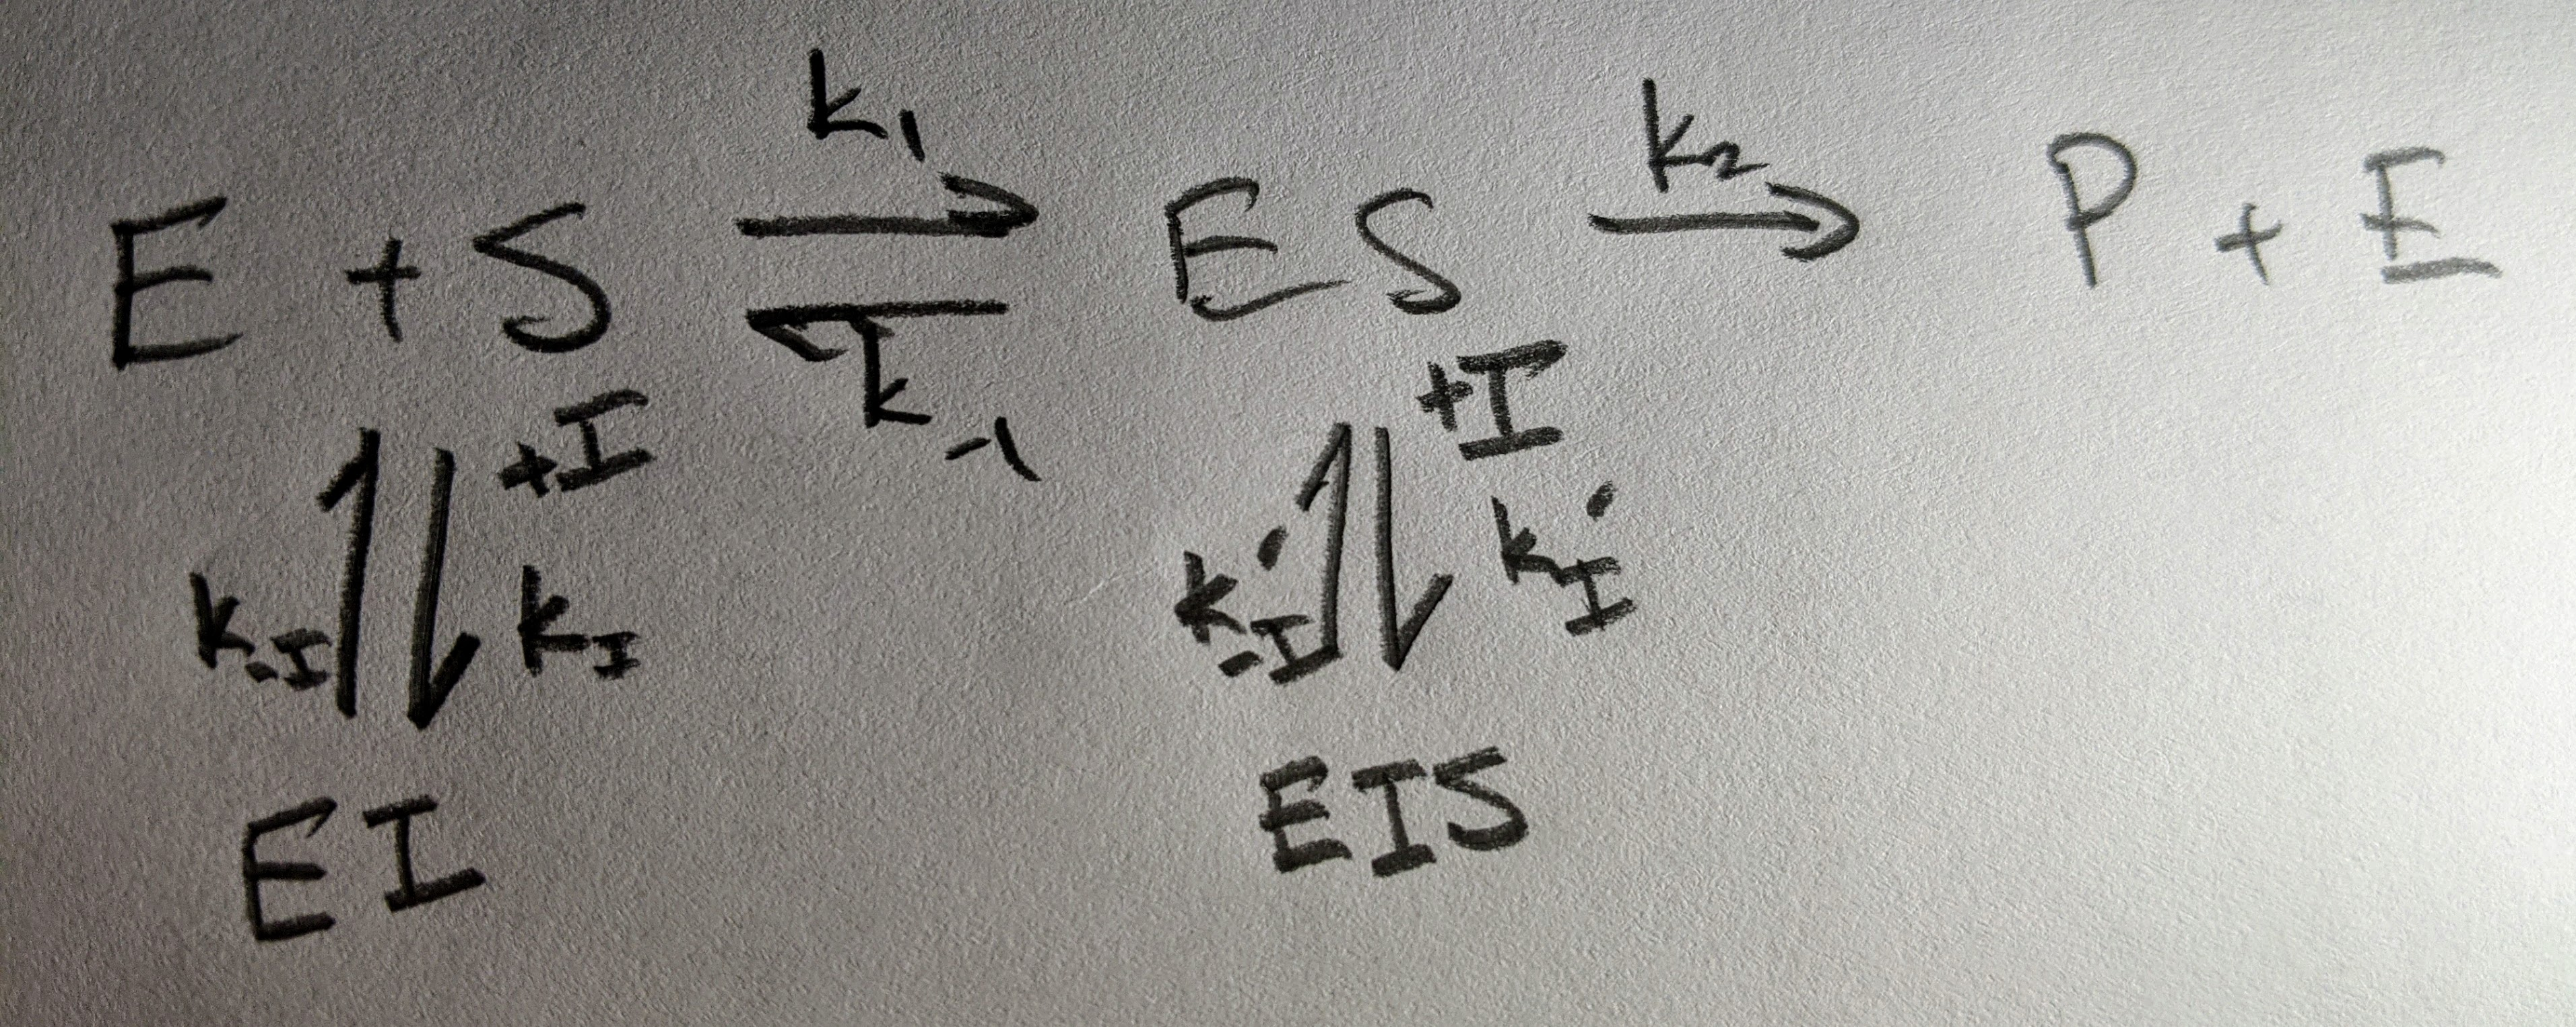

Using a method similar to that used to derive the Michaelis Menten equation above, we can find a rate equation for inhibited reactions too. This is a general equation that works for all classes of Michaelis Menten inhibition where there is one active site or where active sites work independently and don't interact. This equation is
$$v_0=\dfrac{V_{max}[S]}{Km\left(1+\dfrac{[I]}{K_I}\right)+[S]\left(1+\dfrac{[I]}{K_I'}\right)} $$

Here $K_I$ and $K_I'$ are the $dissociation equilibrium constants for the first and second side reactions, respectively.

##Derivation of Inhibited Michaelis Menten Equation
We'll start with some of the same idea as the original derivation but the steady-state equation for ES now has a couple of additional terms due to the second side reaction to form EIS.

In [71]:
import sympy as sp
t=sp.symbols('t',positive=True,real=True) #time
v0=sp.symbols('v_0',positive=True,real=True) # rate
S=sp.symbols('[S]',positive=True,real=True) # substrate concentration
E=sp.symbols('[E]',positive=True,real=True) # free enzyme concentration
ES=sp.Function('[ES]')(t) # bound enzyme concentration
P=sp.Function('[P]')(t) # product concentration
I=sp.symbols('[I]') # free inhibitor
EIS,EI=sp.symbols('[EIS],[EI]') #bound inhibitor
k1,km1,k2,kI,kmI,kIp,kmIp=sp.symbols('k_1,k_{-1},k_2,k_I,k_{-I},k_I\',k_{-I}\'',positive=True,real=True) #rate constants
Km,Ki,Kip=sp.symbols('K_M,K_I,K_{I}\'',positive=True,real=True) # Michaelis constant = (k2+km1)/k1 and dissociation constants for the first and second side reactions
vmax=sp.symbols('V_{max}',positive=True,real=True) # maximum rate
E0=sp.symbols('[{E_0}]') # total enzyme

Now let's enter some dissociation constants for ES (just as before), for EI, and for EIS.

In [72]:
KM=sp.Eq(Km,E*S/ES)
KI=sp.Eq(Ki,E*I/EI)
KIp=sp.Eq(Kip,ES*I/EIS)

Solve $K_I'$ equation for EIS

In [ ]:
EIS_expr=sp.Eq(EIS,sp.solve(KIp,EIS)[0])
EIS_expr

solve $K_I$ expression for E

In [ ]:
EI_expr=sp.Eq(EI,sp.solve(KI,EI)[0])
EI_expr

solve $K_M$ expression for E.

In [ ]:
E_expr=sp.Eq(E,sp.solve(KM,E)[0])
E_expr

The total enzyme concentration is this time going to be the sum of four quantities, the free enzyme, the enzyme bound to either S or I, and the enzyme bound to both S and I.

In [ ]:
totenzyme=sp.Eq(E0,E+ES+EI+EIS)
totenzyme

Now substitute into this the expressions we solved for above for EIS, EI, and E, in that order. 

In [ ]:
totenzyme=totenzyme.subs(EI,EI_expr.rhs).subs(EIS,EIS_expr.rhs).subs(E,E_expr.rhs)
totenzyme

Now we can go back to our relation between the rate and the maimum rate. Again, the rate of formation of product is $v_0=k_2[ES]$ with the maximum rate being when [ES]=[E$_0$]. So $$\dfrac{v_0}{V_{max}}=\dfrac{[ES]}{[E_0]}$$.

In [ ]:
rateratio=sp.Eq(v0/vmax,k2*ES/(k2*E0))
rateratio

In [ ]:
rateratio=sp.Eq(v0,sp.solve(rateratio,v0)[0])
rateratio

Now all we need to do is to substitute the expression for the total enzyme concentration we derived above. Each of its terms contains [ES] so the [ES] terms in numerator and denominator will cancel.

In [ ]:
rateratio=rateratio.subs(E0,totenzyme.rhs).simplify()
rateratio

Now this form is not the most intuitively useful. It's hard to recognize the connection to the normal Michalis-Menten equation from this point. If we divide numerator and denominator by $K_IK_I'$ and factor the denominator into two terms, one containing $K_M$ and the other containing [S] we get $$v_0=\dfrac{V_{max}[S]}{K_M\left(1+\dfrac{[I]}{K_I}\right) +[S]\left(1+\dfrac{[I]}{K_I'}\right)}$$

This is now the same as the normal Michaelis Menten equation except for the two terms that are both 1 or larger (since they are 1 plus some value that is never negative).

## Limiting cases
Now that we have a full equation for inhibited enzyme kinetics, let's look at a few limiting cases. These cases will depend on the relative values of $K_I$ and $K_I'$

First make a function for the inhibition equation.

In [3]:
def MMI(S,Km,Vmax,I,KI1,KI2): # define Michaelis-Menten equation with inhibition
  return Vmax*S/(Km*(1+I/KI1)+S*(1+I/KI2))

TypeError: ignored

In [10]:
s=[s for s in np.arange(0,10,.1)]

There are several cases to consider. 


###**case 0:** 
This is the uninhibited case. If $K_I$ and $K_I'$ are infinite, no inhibitor is bound and the equation collapses to the standard Michaelis-Menten equation.



In [ ]:
s=np.linspace(-3,10.01,100)
plt.plot(s,MMI(s,.2,10,0,10,10),label='no inhibition')
plt.plot(s,MMI(s,.2,10,5,5,1e10),label='competitive')

plt.legend()

plt.xlim(0,10)
plt.ylim(0,11)
plt.xlabel('[S]')
plt.ylabel(r'$\nu_o$')
plt.show()

###case 1:
$K_I'=\infty$

If the inhibitor does not bind to the enzyme-substrate complex, the rate equation simplifies to $$v_o=\dfrac{V_{max}[S]}{K_M\left(1+\dfrac{[I]}{K_I}\right)+ [S]} $$
The term in parentheses is a constant for given inhibitor concentration. This constant is also greater than 1 meaning that, effectively, when multiplied by $K_M$ we can write the rate equation as $$v_o=\dfrac{V_{max}[S]}{K_M'+ [S]}$$ where $K_M'$ is bigger than $K_M$. You'll note that the equation is Michaelis-Menten-like with only a slightly bigger $K_M$ which corresponds to an effectively smaller affinity of the substrate for the enzyme. 

The inhibited case rises up less quickly but asymptotically approaches the same $V_{max}$ at high enough [S]. This implies that inhibitor and substrate are competing for the same active site.

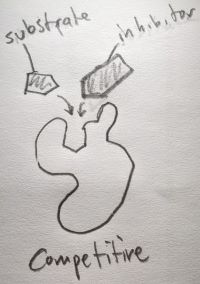

If we make a double reciprocal plot of this type of inhibition we find a common y-intercept (1/$V_{max}$) but a different slope ($K_M/V_{max}$) and $x$-intercept (-1/$K_M$).

In [ ]:
#Competitive

plt.plot(1/s,1/MMI(s,1,10,0,10,10),label='[I]=0')
plt.plot(1/s,1/MMI(s,1,10,5,10,1e10),label='[I]=5')
plt.plot(1/s,1/MMI(s,1,10,10,10,1e10),label='[I]=10')
plt.vlines(0,0,10,linestyles='dotted',color='red')
plt.xlabel('1/[S]')
plt.ylabel('1/$v_o$')
plt.xlim(-3,10)
plt.ylim(0,2)
plt.legend()
plt.show()

###**case 2:**
$K_I=\infty$

If the inhibitor does not bind to the free enzyme, the rate equation simplifies to $$v_o=\dfrac{V_{max}[S]}{K_M+ [S]\left(1+\dfrac{[I]}{K_I'}\right)} $$
The term in parentheses is a constant for given inhibitor concentration. Here we'll divide numerator and denominator by this factor leading to $$v_o=\dfrac{V_{max}'[S]}{K_M'+ [S]}$$ where $K_M'$ is smaller than $K_M$ and $V_{max}'$ is smaller than $V_{max}$. This means the substrate effectively bonds more tightly to the enzyme (because some of it is in the EIS form) but that does not translate to high rates of change into produce (again, because some of it is in the EIS form).

In [ ]:
plt.plot(s,MMI(s,1,10,0,10,10),label='no inhibition')
plt.plot(s,MMI(s,1,10,5,10e10,10),label='uncompetitive')
plt.legend()
plt.xlim(0,10)
plt.ylim(0,11)
plt.xlabel('[S]')
plt.ylabel(r'$\nu_o$')
plt.show()

You should be able to see how the $K_M$ and $V_{max}$ are changing in the graph. If we think about the values of the inhibition dissociation constants, the inhibitor only binds when the substrate is present. That seems to indicate a situation where the inhibitor blocks the release of the product. One scenario where this could happen is when the inhibitor binding site is near but not the same as the substrate binding site. It may not be strictly necessary for this to be the case but it does seem to be the most readily accessible image.

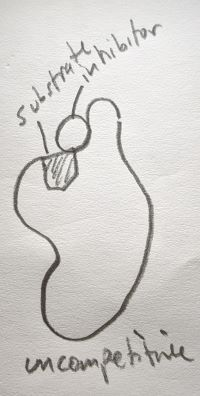

In the Lineweaver-Burk plot we get the following. The constant slope is a consequence of both the parameters being decreased by the same amount. The intercepts indicate the decrease of both parameters as well.

One additional potentially useful way to distinguish from the competitive case for which the lines cross at the $y$-axis, is that here you could say that the lines 'cross' at -$\infty$. That may be more useful than saying that they don't cross at all, although practically speaking, that's the same thing.

In [ ]:
#uncompetitive
S=np.linspace(-3,10.01,100)

plt.plot(1/s,1/MMI(s,1,10,0,10,10))
plt.plot(1/s,1/MMI(s,1,10,5,1e10,10))
plt.plot(1/s,1/MMI(s,1,10,10,1e10,10))
plt.vlines(0,0,10,linestyles='dotted',color='red')
plt.xlim(-3,10)
plt.ylim(0,1.25)

###**case 3:**
$K_I=K_I'<\infty$

If the inhibitor binds to both the enzyme substrate complexe and to free enzyme, the rate equation simplifies to $$v_o=\dfrac{\dfrac{V_{max}}{\left(1+\dfrac{[I]}{K_I'}\right)}[S]}{K_M+ [S]} $$
The term in parentheses is a constant for given inhibitor concentration. Here we'll divide numerator and denominator by this factor leading to $$v_o=\dfrac{V_{max}'[S]}{K_M+ [S]}$$ where $V_{max}'$ is smaller than $V_{max}$. This means that the binding is unaffected by the inhibition but the maximum rate is.

In [ ]:
plt.plot(s,MMI(s,1,10,0,10,10),label='no inhibition')
plt.plot(s,MMI(s,1,10,5,10,10),label='noncompetitive')
plt.legend()
plt.xlim(0,10)
plt.ylim(0,11)
plt.xlabel('[S]')
plt.ylabel(r'$\nu_o$')
plt.show()

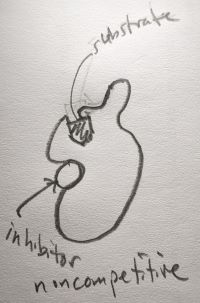

In [ ]:
#nonompetitive
plt.plot(1/s,1/MMI(s,1,10,0,10,10))
plt.plot(1/s,1/MMI(s,1,10,5,10,10))
plt.plot(1/s,1/MMI(s,1,10,10,10,10))
plt.vlines(0,0,10,linestyles='dotted',color='red')
plt.xlim(-3,10)
plt.ylim(0,2)
plt.show()

### Mixed Inhibition

In [ ]:
#mixed
plt.plot(1/s,1/MMI(s,1,10,0,10,20))
plt.plot(1/s,1/MMI(s,1,10,5,10,20))
plt.plot(1/s,1/MMI(s,1,10,10,10,20))
plt.vlines(0,0,10,linestyles='dotted',color='red')
plt.xlim(-3,10)
plt.ylim(0,2)
plt.show()

In [ ]:
#mixed
plt.plot(1/s,1/MMI(s,1,10,0,30,10))
plt.plot(1/s,1/MMI(s,1,10,5,30,10))
plt.plot(1/s,1/MMI(s,1,10,10,30,10))
plt.vlines(0,0,10,linewidth=.5,color='black')
plt.plot(1/S,np.zeros(100),color='black',linewidth=.5)
plt.xlim(-3,10)
plt.ylim(-.5,2)
plt.show()

### Substrate Inhibition

What if the substrate can act as an inhibitor? [This can apparently happen quite frequently](https://pubs.rsc.org/en/content/articlelanding/2021/cb/d0cb00171f#:~:text=Substrate%20inhibition%20is%20the%20most,molecules%20to%20the%20active%20site.) most often as two substrate molecules bind to an active site and produce an unproductive enzyme substrate complex.

This would be like normal inhibition with only one side reaction which would come off the ES complex. We'll call the dissociation constant for the dissociation of the ESS complex $K_S$. As before, a high dissociation constant implies less inhibition. Lower dissociation constant means more complex is formed and more inhibition.

We won't derive the rate equation but you could simply make $K_I=\infty$, $K_I'=K_S$, and [I]=[S] in the general inhibition equation to get
$$v_0=\dfrac{V_{max}[S]}{K_M+[S]\left(1+\dfrac{[S]}{K_S}\right)}$$

Let's define this as a function and make some plots.

In [23]:
def MMS(S,Km,Vmax,KS): # define Michaelis-Menten equation with substrate inhibition
  return Vmax*S/(Km+S*(1+S/KS))

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(s,MMS(s,1,10,1),label='$K_S=$1',color='red')
plt.plot(s,MMS(s,1,10,10),label='$K_S=$10')
plt.plot(s,MMS(s,1,10,100),label='$K_S=$100')


plt.xlim(0,10)
plt.ylim(0,11)
plt.legend()
plt.xlabel('[S]')
plt.ylabel(r'$\nu_o$')
plt.savefig('subsinh.png')
plt.show()
